In [18]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
# first, generate some data
# for a regression problem, we're going to want data with 
# some kind of linear trend
# will use np.linspace() for this

In [92]:
# from 0 to 100, with 50 points

x_lin = np.linspace(0,100,50)

x_lin

array([  0.        ,   2.04081633,   4.08163265,   6.12244898,
         8.16326531,  10.20408163,  12.24489796,  14.28571429,
        16.32653061,  18.36734694,  20.40816327,  22.44897959,
        24.48979592,  26.53061224,  28.57142857,  30.6122449 ,
        32.65306122,  34.69387755,  36.73469388,  38.7755102 ,
        40.81632653,  42.85714286,  44.89795918,  46.93877551,
        48.97959184,  51.02040816,  53.06122449,  55.10204082,
        57.14285714,  59.18367347,  61.2244898 ,  63.26530612,
        65.30612245,  67.34693878,  69.3877551 ,  71.42857143,
        73.46938776,  75.51020408,  77.55102041,  79.59183673,
        81.63265306,  83.67346939,  85.71428571,  87.75510204,
        89.79591837,  91.83673469,  93.87755102,  95.91836735,
        97.95918367, 100.        ])

In [93]:
# from -1.5 - 1.5, with 100 points

noise = np.random.uniform(-10.5,10.5,50)

noise

array([ 6.93026413,  0.15597432,  1.98898459,  5.60474119, -9.41345756,
        9.3212174 , -7.0284277 ,  9.08370909,  0.39371744,  3.6670621 ,
       -0.90738688, -2.34640909, -0.59555027, -9.01644335, -0.02815959,
        4.65186598,  5.24370147, -5.06099757, -7.50837022,  3.61140588,
       -4.42756533, 10.1340535 , -3.20338951,  5.17735698, -4.1209615 ,
        6.6468593 , -1.1507371 , -3.52044704, -7.49117724, -8.48983634,
       -7.03378921,  3.04677553,  6.0822634 , -6.39075901,  0.75256463,
       -9.44429244,  0.30627532,  5.33984228, -8.0846303 , -7.53906785,
        1.813023  ,  4.33443871, -4.68535171, -4.59641115, -8.34484718,
       -6.54075368, -1.81443374,  2.02476355, -4.15536992,  6.54239882])

In [94]:
x = x_lin + noise

x

array([  6.93026413,   2.19679065,   6.07061724,  11.72719017,
        -1.25019226,  19.52529904,   5.21647025,  23.36942338,
        16.72024806,  22.03440904,  19.50077638,  20.1025705 ,
        23.89424565,  17.5141689 ,  28.54326899,  35.26411088,
        37.8967627 ,  29.63287998,  29.22632365,  42.38691608,
        36.3887612 ,  52.99119636,  41.69456967,  52.11613249,
        44.85863034,  57.66726747,  51.91048739,  51.58159378,
        49.65167991,  50.69383713,  54.19070059,  66.31208165,
        71.38838585,  60.95617977,  70.14031974,  61.98427899,
        73.77566308,  80.85004636,  69.46639011,  72.05276888,
        83.44567606,  88.0079081 ,  81.028934  ,  83.15869089,
        81.45107119,  85.29598102,  92.06311728,  97.9431309 ,
        93.80381375, 106.54239882])

In [95]:
# same thing for y (condensed)
# but with 10 labels

y_labels = np.linspace(0,100,50) + np.random.uniform(-10.5,10.5,50)

y_labels

array([  4.00311019,  -2.11890422,   2.7083726 ,  -3.48642838,
        10.14646849,  15.28207037,   2.1440489 ,  19.20636075,
        15.08335823,  11.1790352 ,  19.10499881,  13.65546608,
        28.21614099,  24.27016598,  31.10807917,  20.72108379,
        41.39263279,  31.46135289,  36.26368514,  35.91300511,
        43.54246278,  40.94687132,  49.59070005,  49.91642057,
        53.28027377,  41.9675579 ,  61.85670506,  55.5519933 ,
        53.03037199,  55.18167909,  61.07602816,  70.91978959,
        61.21362554,  68.87187374,  71.21228512,  66.04444145,
        64.84446327,  74.02588077,  71.08357319,  70.55646939,
        88.78853263,  85.26517605,  91.14114637,  81.13095607,
        91.82483529,  89.96885198,  94.12215047,  86.66605517,
       107.25752776,  95.08260723])

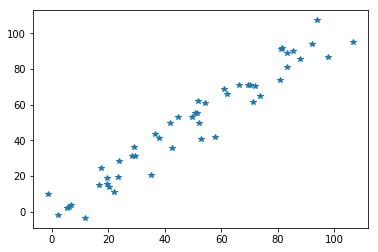

In [96]:
plt.plot(x, y_labels, '*')

In [97]:
# cool! now we have linear-trending data with some noise in it

## modelling the equation: variables, step 1/2

a linear regressor looks for a predictive linear trend in data. we are solving for a line:

y = mx + b

we can model this equation pretty literally using tensorflow.

In [98]:
# going to initialize 2 variables for m and b
# initializing them with random values

m = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())

## cost function

In [99]:
error = 0

# create a list of tuples

for x,y in zip(x, y_labels):
    
    # y_hat == predicted value
    
    y_hat = m * x + b
    
    # squaring the error emphasizes and punishes higher errors 
    
    error += (y - y_hat) **2

## optimizer

In [100]:
# tf has a number of optimizers
# this example uses gradient descent, but could easily choose another
# 0.001 is a standard starting place for a learning rate

GrD_optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

# optimizers have a number of methods attached to them
# like .minimize(value_to_be_minimized)

training = GrD_optimizer.minimize(error)

## initialization: variables, step 2/2

In [103]:
initializer = tf.global_variables_initializer()

## run in a session


In [104]:
with tf.Session() as sess:
    
    # initialize variables
    
    sess.run(initializer)
    
    # number of training cycles
    
    epochs = 10
    
    for i in range(epochs):
        
        # train model using our defined cost function & optimizer
        
        sess.run(training)
        
        # get results
        
        slope, intercept = sess.run([m,b])

In [105]:
slope

-6.872214e+23

In [106]:
intercept

-1.0424998e+22